In [1]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import shap
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import TargetEncoder
from sklearn import linear_model
from sklearn.linear_model import Lasso
from statsmodels.tools.tools import add_constant

In [16]:
df = pd.read_csv('https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv',sep=';',quotechar='"')
mapeo_columns = {'default':'has_cred','duration':'duration_secs','campaign':'touch_points','pdays':'interv_contact','previous':'prev_touchpt','poutcome':'past_result'}
df = df.rename(columns=mapeo_columns)
pd.set_option('display.max_columns', None)
df

,age,job,marital,education,has_cred,housing,loan,contact,month,day_of_week,duration_secs,touch_points,interv_contact,prev_touchpt,past_result,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [3]:
df.shape

(41188, 21)

In [4]:
unicos = df.nunique()
print(unicos)

age                 78
job                 12
marital              4
education            8
has_cred             3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration_secs     1544
touch_points        42
interv_contact      27
prev_touchpt         8
past_result          3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [5]:
df.duplicated().sum()

np.int64(12)

In [6]:
#revision filas duplicadas
filas_dup = df[df.duplicated(keep=False)]


In [7]:
#eliminar filas duplicadas
df.drop_duplicates(inplace=True)

In [8]:
#identificar columnas duplicadas
df.T.duplicated().sum()
df.T.duplicated(keep=False)

age               False
job               False
marital           False
education         False
has_cred          False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration_secs     False
touch_points      False
interv_contact    False
prev_touchpt      False
past_result       False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [20]:
# df_cate = df.select_dtypes(include=['object'])
# # sacamos la cantidad de unknown por columna
# unknown_counts = df_cate.apply(lambda col: (col == "unknown").sum())
# # sacamos el porcentaje de unknown
# unknown_porce= df_cate.apply(lambda col: (col == "unknown").mean()*100)
# # creamos un DF con esta info
# df_result=pd.DataFrame({'unknown_counts':unknown_counts,'unknown_porcentaje':unknown_porce}).sort_values(by='unknown_counts',ascending=False)
# df_result

In [13]:
#valores faltantes 
df.shape

(41176, 20)

In [14]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]
print(faltantes)

age              0.00
job              0.00
marital          0.00
education        0.00
has_cred         0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration_secs    0.00
touch_points     0.00
interv_contact   0.00
prev_touchpt     0.00
past_result      0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
dtype: float64


In [26]:
#identificar otros valores faltantes

cat_col = df.select_dtypes(include=['object']).columns

for col in cat_col: 
    print(df[col].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
has_cred
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: i

In [31]:
df_otros_falt = df.replace(['unknown','nonexistent'],np.nan,inplace=True)
df


,age,job,marital,education,has_cred,housing,loan,contact,month,day_of_week,duration_secs,touch_points,interv_contact,prev_touchpt,past_result,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,NaN,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,NaN,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,NaN,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,NaN,-1.10,94.77,-50.80,1.03,4963.60,yes


<Axes: >

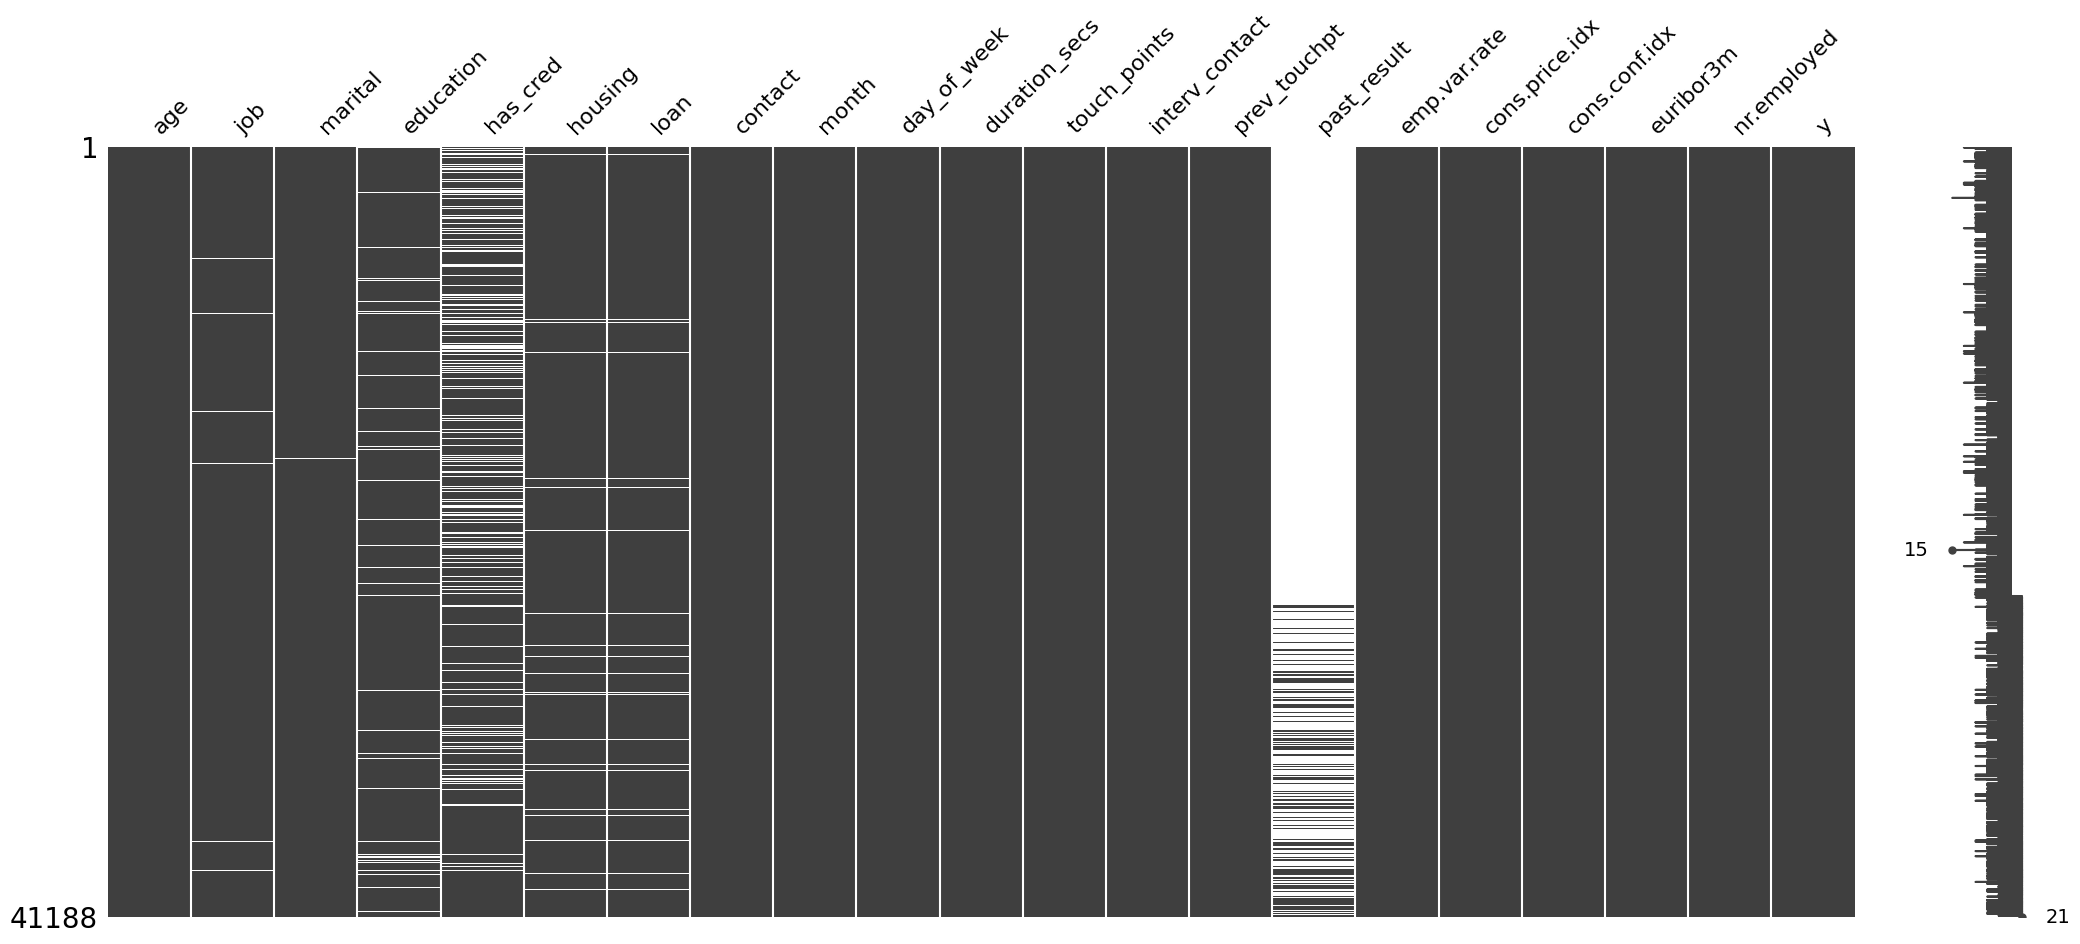

In [32]:
msno.matrix(df)